In [17]:
import numpy as np
from numpy import pi
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import matplotlib.animation as animation

import warnings

warnings.filterwarnings("ignore")


AttributeError: 'module' object has no attribute 'display_animation'

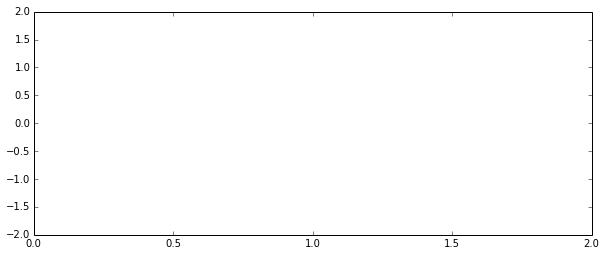

In [18]:
fig = plt.figure(figsize=(10,4))
fig.set_dpi(100)
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

#Diffusion constant
k = 2

#Scaling factor (for visualisation purposes)
scale = 5

#Length of the rod (0,L) on the x axis
L = pi

#Initial contitions u(0,t) = u(L,t) = 0. Temperature at x=0 and x=L is fixed
x0 = np.linspace(0,L+1,1000)
t0 = 0
temp0 = 5  #Temperature of the rod at rest (before heating)
#Increment
dt = 0.01
#Heat function
def u(x,t):
     return temp0 + scale*np.exp(-k*t)*np.sin(x)
    

#Gradient of u
def grad_u(x,t):
                                    #du/dx              #du/dt
     return scale*np.array([np.exp(-k*t)*np.cos(x),-k*np.exp(-k*t)*np.sin(x)])

a = []
t = []
for i in range(500):
    value = u(x0,t0) + grad_u(x0,t0)[1]*dt
    t.append(t0)
    t0 = t0 + dt
    a.append(value)

def init():
    line.set_data([], [])
    return line,
    
k = 0
def animate(i):         #The plot shows the temperature evolving with time
    global k            #at each point x in the rod
    x = a[k]            #The ends of the rod are kept at temperature temp0
    k += 1              #The rod is heated in one spot, then it cools down
    ax1.clear()
    line.set_data(x0,x)
    return line,
    #,color='red',label='Temperature at each x')
    #plt.plot(0,0,color='red',label='Elapsed time '+str(round(t[k],2)))
    #plt.grid(True)
    #plt.ylim([temp0-2,2.5*scale])
    #plt.xlim([0,L])
    #plt.title('Heat equation')
    #plt.legend()
anim = animation.FuncAnimation(fig,animate,init_func=init,frames=360,interval=20, blit=True)
animation.display_animation(anim)